In [19]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
def read_datasets():
    """ Reads user profiles from CSV files """
    genuine_users = pd.read_csv("users.csv")
    fake_users = pd.read_csv("fusers.csv")
    
    x = pd.concat([genuine_users, fake_users], ignore_index=True)
    
    y = np.concatenate([np.zeros(len(genuine_users)), np.ones(len(fake_users))])
    
    return x, y

x, y = read_datasets()

print("Sample Data:")
display(x.head())
print("\nLabels Sample:", y[:5])

Sample Data:


,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,url,...,profile_background_image_url,profile_background_color,profile_link_color,utc_offset,protected,verified,description,updated,dataset,fav_number
0,3610511,Davide Dellacasa,braddd,20370,5470,2385,145,52,Fri Apr 06 10:58:22 +0000 2007,http://braddd.tumblr.com,...,http://a0.twimg.com/profile_background_images/...,BADFCD,FF0000,3600.0,NaN,NaN,Founder of http://www.screenweek.it & http://w...,14-02-2015 10:54,E13,NaN
1,5656162,Simone Economo,eKoeS,3131,506,381,9,40,Mon Apr 30 15:08:42 +0000 2007,http://www.lineheight.net/,...,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,3600.0,NaN,NaN,BSc degree (cum laude) in Computer Engineering...,14-02-2015 10:54,E13,NaN
2,5682702,tacone,tacone_,4024,264,87,323,16,Tue May 01 11:53:40 +0000 2007,http://t.co/LKrl1dZE,...,http://a0.twimg.com/profile_background_images/...,1A1B1F,2FC2EF,3600.0,NaN,NaN,Cogito ergo bestemmio.,14-02-2015 10:54,E13,NaN
3,6067292,alesaura,alesstar,40586,640,622,1118,32,Tue May 15 16:55:16 +0000 2007,http://alesstar.wordpress.com/,...,http://a0.twimg.com/images/themes/theme4/bg.gif,0099B9,0099B9,3600.0,NaN,NaN,"Se la vita ti dà sarde, scapocciale!",14-02-2015 10:54,E13,NaN
4,6015122,Angelo,PerDiletto,2016,62,64,13,0,Sun May 13 19:52:00 +0000 2007,http://www.flickr.com/per_diletto,...,http://a0.twimg.com/images/themes/theme18/bg.gif,ACDED6,38543,3600.0,NaN,NaN,Je me souviens,14-02-2015 10:54,E13,NaN



Labels Sample: [0. 0. 0. 0. 0.]


In [9]:
def extract_features(x):
    lang_list = list(enumerate(np.unique(x['lang'])))
    lang_dict = {name: i for i, name in lang_list}
    
    x['lang_code'] = x['lang'].map(lang_dict).astype(int)
    
    feature_columns_to_use = ['statuses_count', 'followers_count', 'friends_count', 
                              'favourites_count', 'listed_count', 'lang_code']
    
    x = x[feature_columns_to_use].fillna(0)
    
    return x

x = extract_features(x)

print("Processed Features:")
display(x.head())


Processed Features:


,statuses_count,followers_count,friends_count,favourites_count,listed_count,lang_code
0,20370,5470,2385,145,52,5
1,3131,506,381,9,40,1
2,4024,264,87,323,16,1
3,40586,640,622,1118,32,1
4,2016,62,64,13,0,5


In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


Training Data Shape: (2254, 6)
Testing Data Shape: (564, 6)


In [11]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

C:\Users\FUJITSU\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,561 (10.00 KB)

 Trainable params: 2,561 (10.00 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9429 - loss: 1.2788 - val_accuracy: 0.9823 - val_loss: 0.2431
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9822 - loss: 0.3262 - val_accuracy: 0.9845 - val_loss: 0.1452
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9933 - loss: 0.0387 - val_accuracy: 0.9800 - val_loss: 0.1934
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9898 - loss: 0.0598 - val_accuracy: 0.9956 - val_loss: 0.0697
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9960 - loss: 0.0783 - val_accuracy: 0.9800 - val_loss: 0.6120
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9908 - loss: 0.4256 - val_accuracy: 0.9911 - val_loss: 0.1482
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9971 - loss: 0.2093 - val_accuracy: 0.9845 - val_loss: 0.0799
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9958 - loss: 0.0547 - val_accuracy: 0.9911 - val_loss:

In [13]:
y_pred_prob = model.predict(X_test)

y_pred = (y_pred_prob > 0.5).astype("int32")

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Test Accuracy: 0.99822695035461


Confusion Matrix:
 [[307   1]
 [  0 256]]


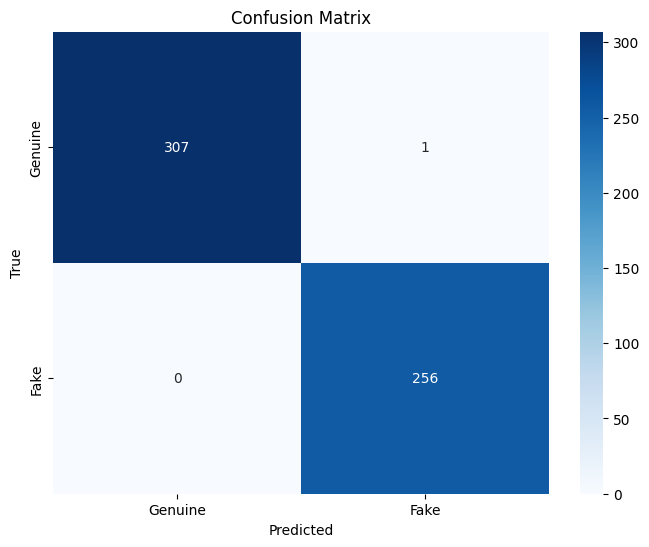

In [14]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Genuine', 'Fake'], yticklabels=['Genuine', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

AUC Score: 0.9993658685064937


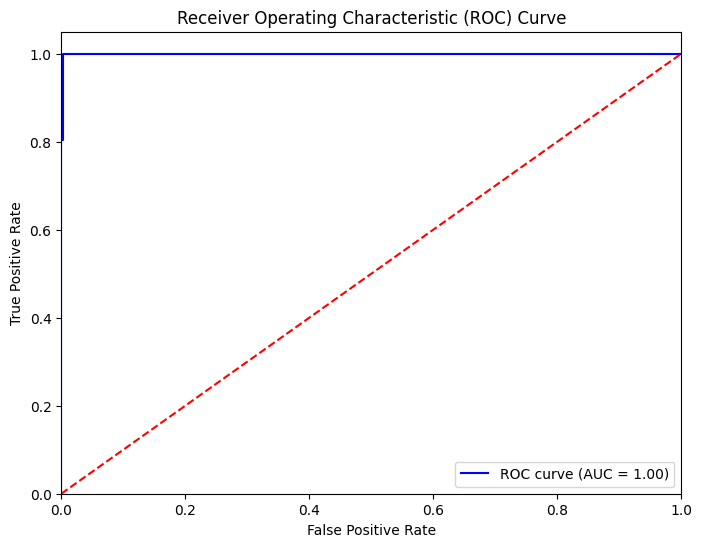

In [15]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
print("AUC Score:", roc_auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [18]:
from sklearn.metrics import accuracy_score

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the model: {accuracy:.2f}")

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Accuracy of the model: 1.00
